   Layer  Percentage Pruning_Type  Match_Percentage
0      1           2       Random         91.185410
1      5           2       Random         97.568389
2      1           2   Similarity         86.626140
3      5           2   Similarity         97.264438
4      2           2       Random         99.696049
Unique layers: [1 5 2 6 3 4]
Unique pruning types: ['Random' 'Similarity']

Pivot table:
Pruning_Type     Random  Similarity
Layer                              
1             91.185410   86.626140
2             99.696049   96.960486
3             96.960486   97.872340
4             97.872340   98.176292
5             97.568389   97.264438
6             97.568389   89.665653


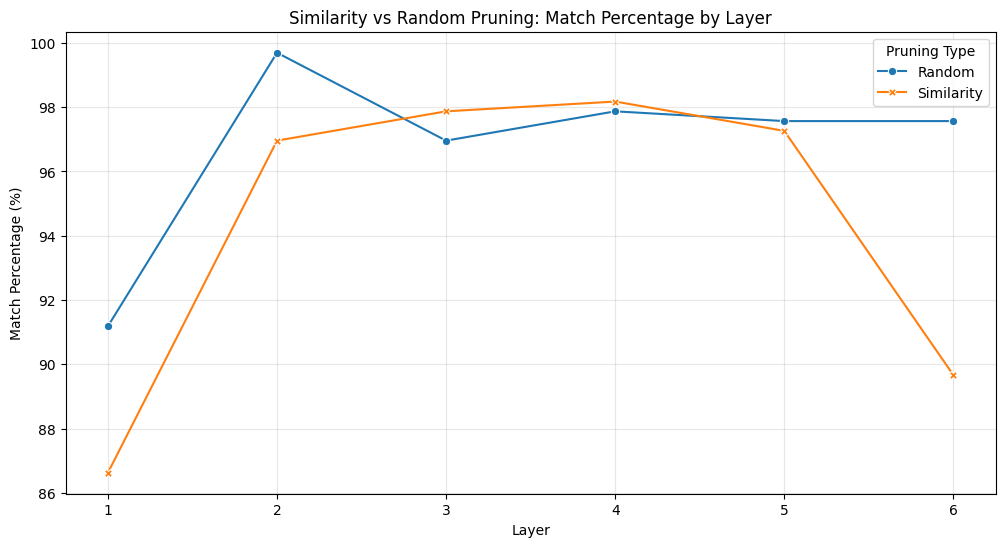

<Figure size 1200x600 with 0 Axes>

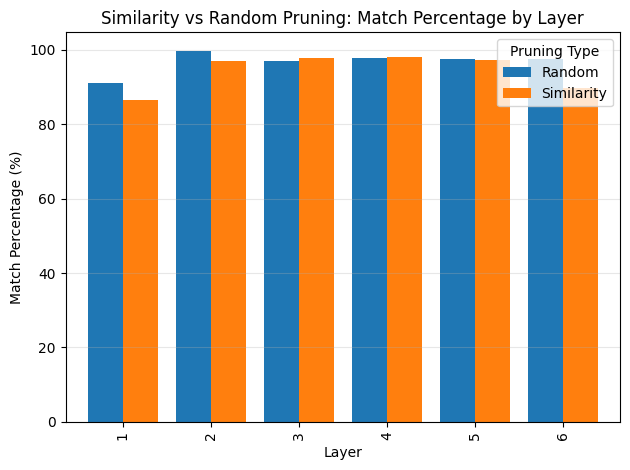

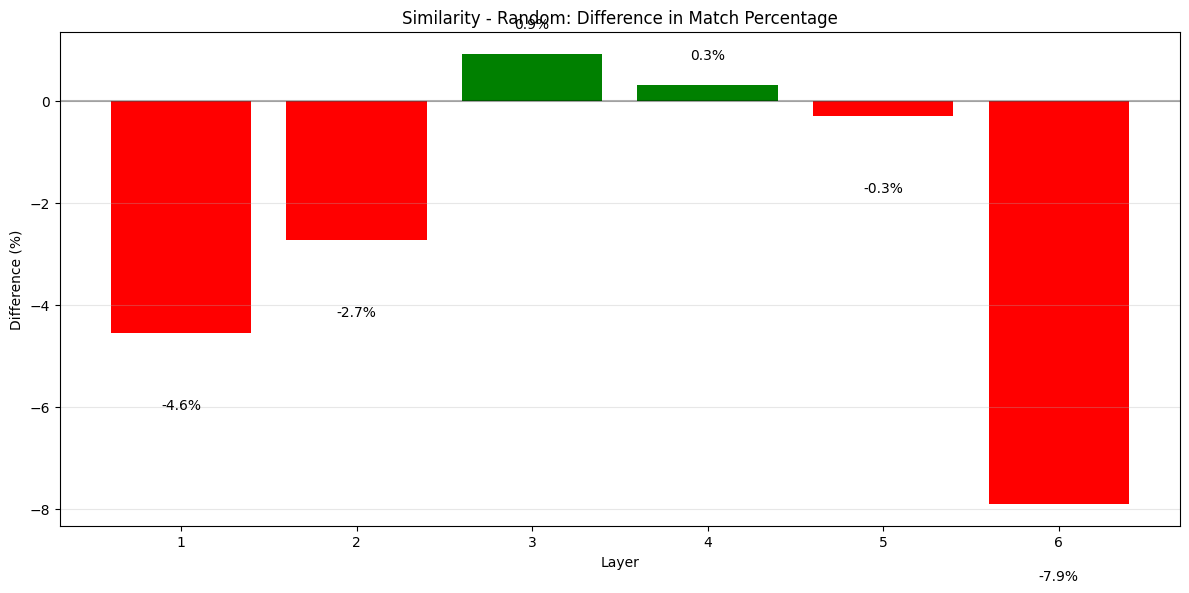

In [5]:
# Loaded variable 'df' from URI: /Users/tansylu/Documents/ssvep/comparison_results/layer_pruning/layer_pruning_comparison.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv(r'/Users/tansylu/Documents/ssvep/comparison_results/layer_pruning/layer_pruning_comparison.csv')

# Check the data
print(df.head())
print(f"Unique layers: {df['Layer'].unique()}")
print(f"Unique pruning types: {df['Pruning_Type'].unique()}")

# Create a pivot table for easier plotting
pivot_df = df.pivot(index='Layer', columns='Pruning_Type', values='Match_Percentage')
print("\nPivot table:")
print(pivot_df)

# Create comparison plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_df, markers=True, dashes=False)
plt.title('Similarity vs Random Pruning: Match Percentage by Layer')
plt.xlabel('Layer')
plt.ylabel('Match Percentage (%)')
plt.grid(True, alpha=0.3)
plt.xticks(pivot_df.index)
plt.legend(title='Pruning Type')
plt.savefig('layer_pruning_comparison_line.png')
plt.show()

# Create bar plot for comparison
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', width=0.8)
plt.title('Similarity vs Random Pruning: Match Percentage by Layer')
plt.xlabel('Layer')
plt.ylabel('Match Percentage (%)')
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Pruning Type')
plt.tight_layout()
plt.savefig('layer_pruning_comparison_bar.png')
plt.show()

# Calculate difference between Similarity and Random pruning
if 'Similarity' in pivot_df.columns and 'Random' in pivot_df.columns:
    pivot_df['Difference'] = pivot_df['Similarity'] - pivot_df['Random']
    
    # Plot the difference
    plt.figure(figsize=(12, 6))
    bars = plt.bar(pivot_df.index, pivot_df['Difference'], 
                  color=['green' if x > 0 else 'red' for x in pivot_df['Difference']])
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Similarity - Random: Difference in Match Percentage')
    plt.xlabel('Layer')
    plt.ylabel('Difference (%)')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(pivot_df.index)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 
                height + (0.5 if height > 0 else -1.5),
                f"{height:.1f}%", 
                ha='center')
    
    plt.tight_layout()
    plt.savefig('layer_pruning_difference.png')
    plt.show()